In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

df = pd.read_csv('../data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Task 1 - Data Analysis:

In [2]:
# Get subset of data
# df = df.iloc[0:10000, :]
print(df.shape)

(284807, 31)


In [3]:
# Summary
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


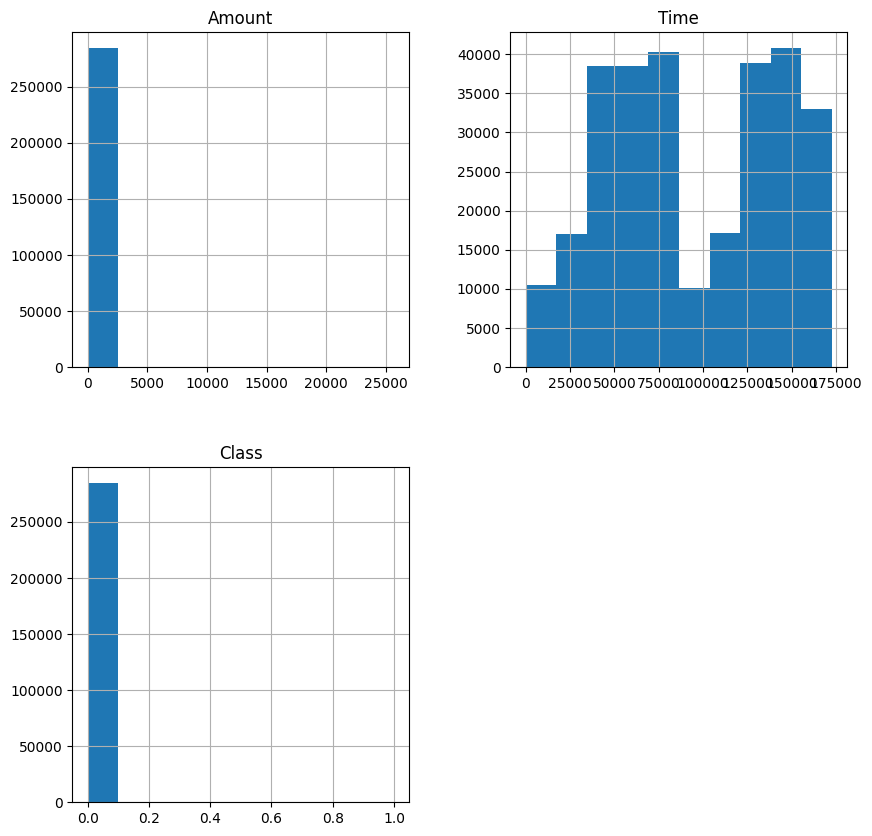

In [4]:
# Plot histogram of Amount, Time, and Class
df[['Amount', 'Time', 'Class']].hist(figsize=(10, 10))
plt.show()

In [5]:
# Determine number of fraud cases in dataset
Fraud = df[df['Class'] == 1]
Valid = df[df['Class'] == 0]

outlier_fraction = len(Fraud) / float(len(Valid))
print('Outlier Fraction: {}'.format(outlier_fraction))

print('Fraud Cases: {}'.format(len(Fraud)))
print('Valid Cases: {}'.format(len(Valid)))
print('data shape: {}'.format(df.shape))

Outlier Fraction: 0.0017304750013189597
Fraud Cases: 492
Valid Cases: 284315
data shape: (284807, 31)


Distributions: By seeing the distributions we can have an idea how skewed are these features, we can also see further distributions of the other features. There are techniques that can help the distributions be less skewed which will be implemented in this notebook in the future.

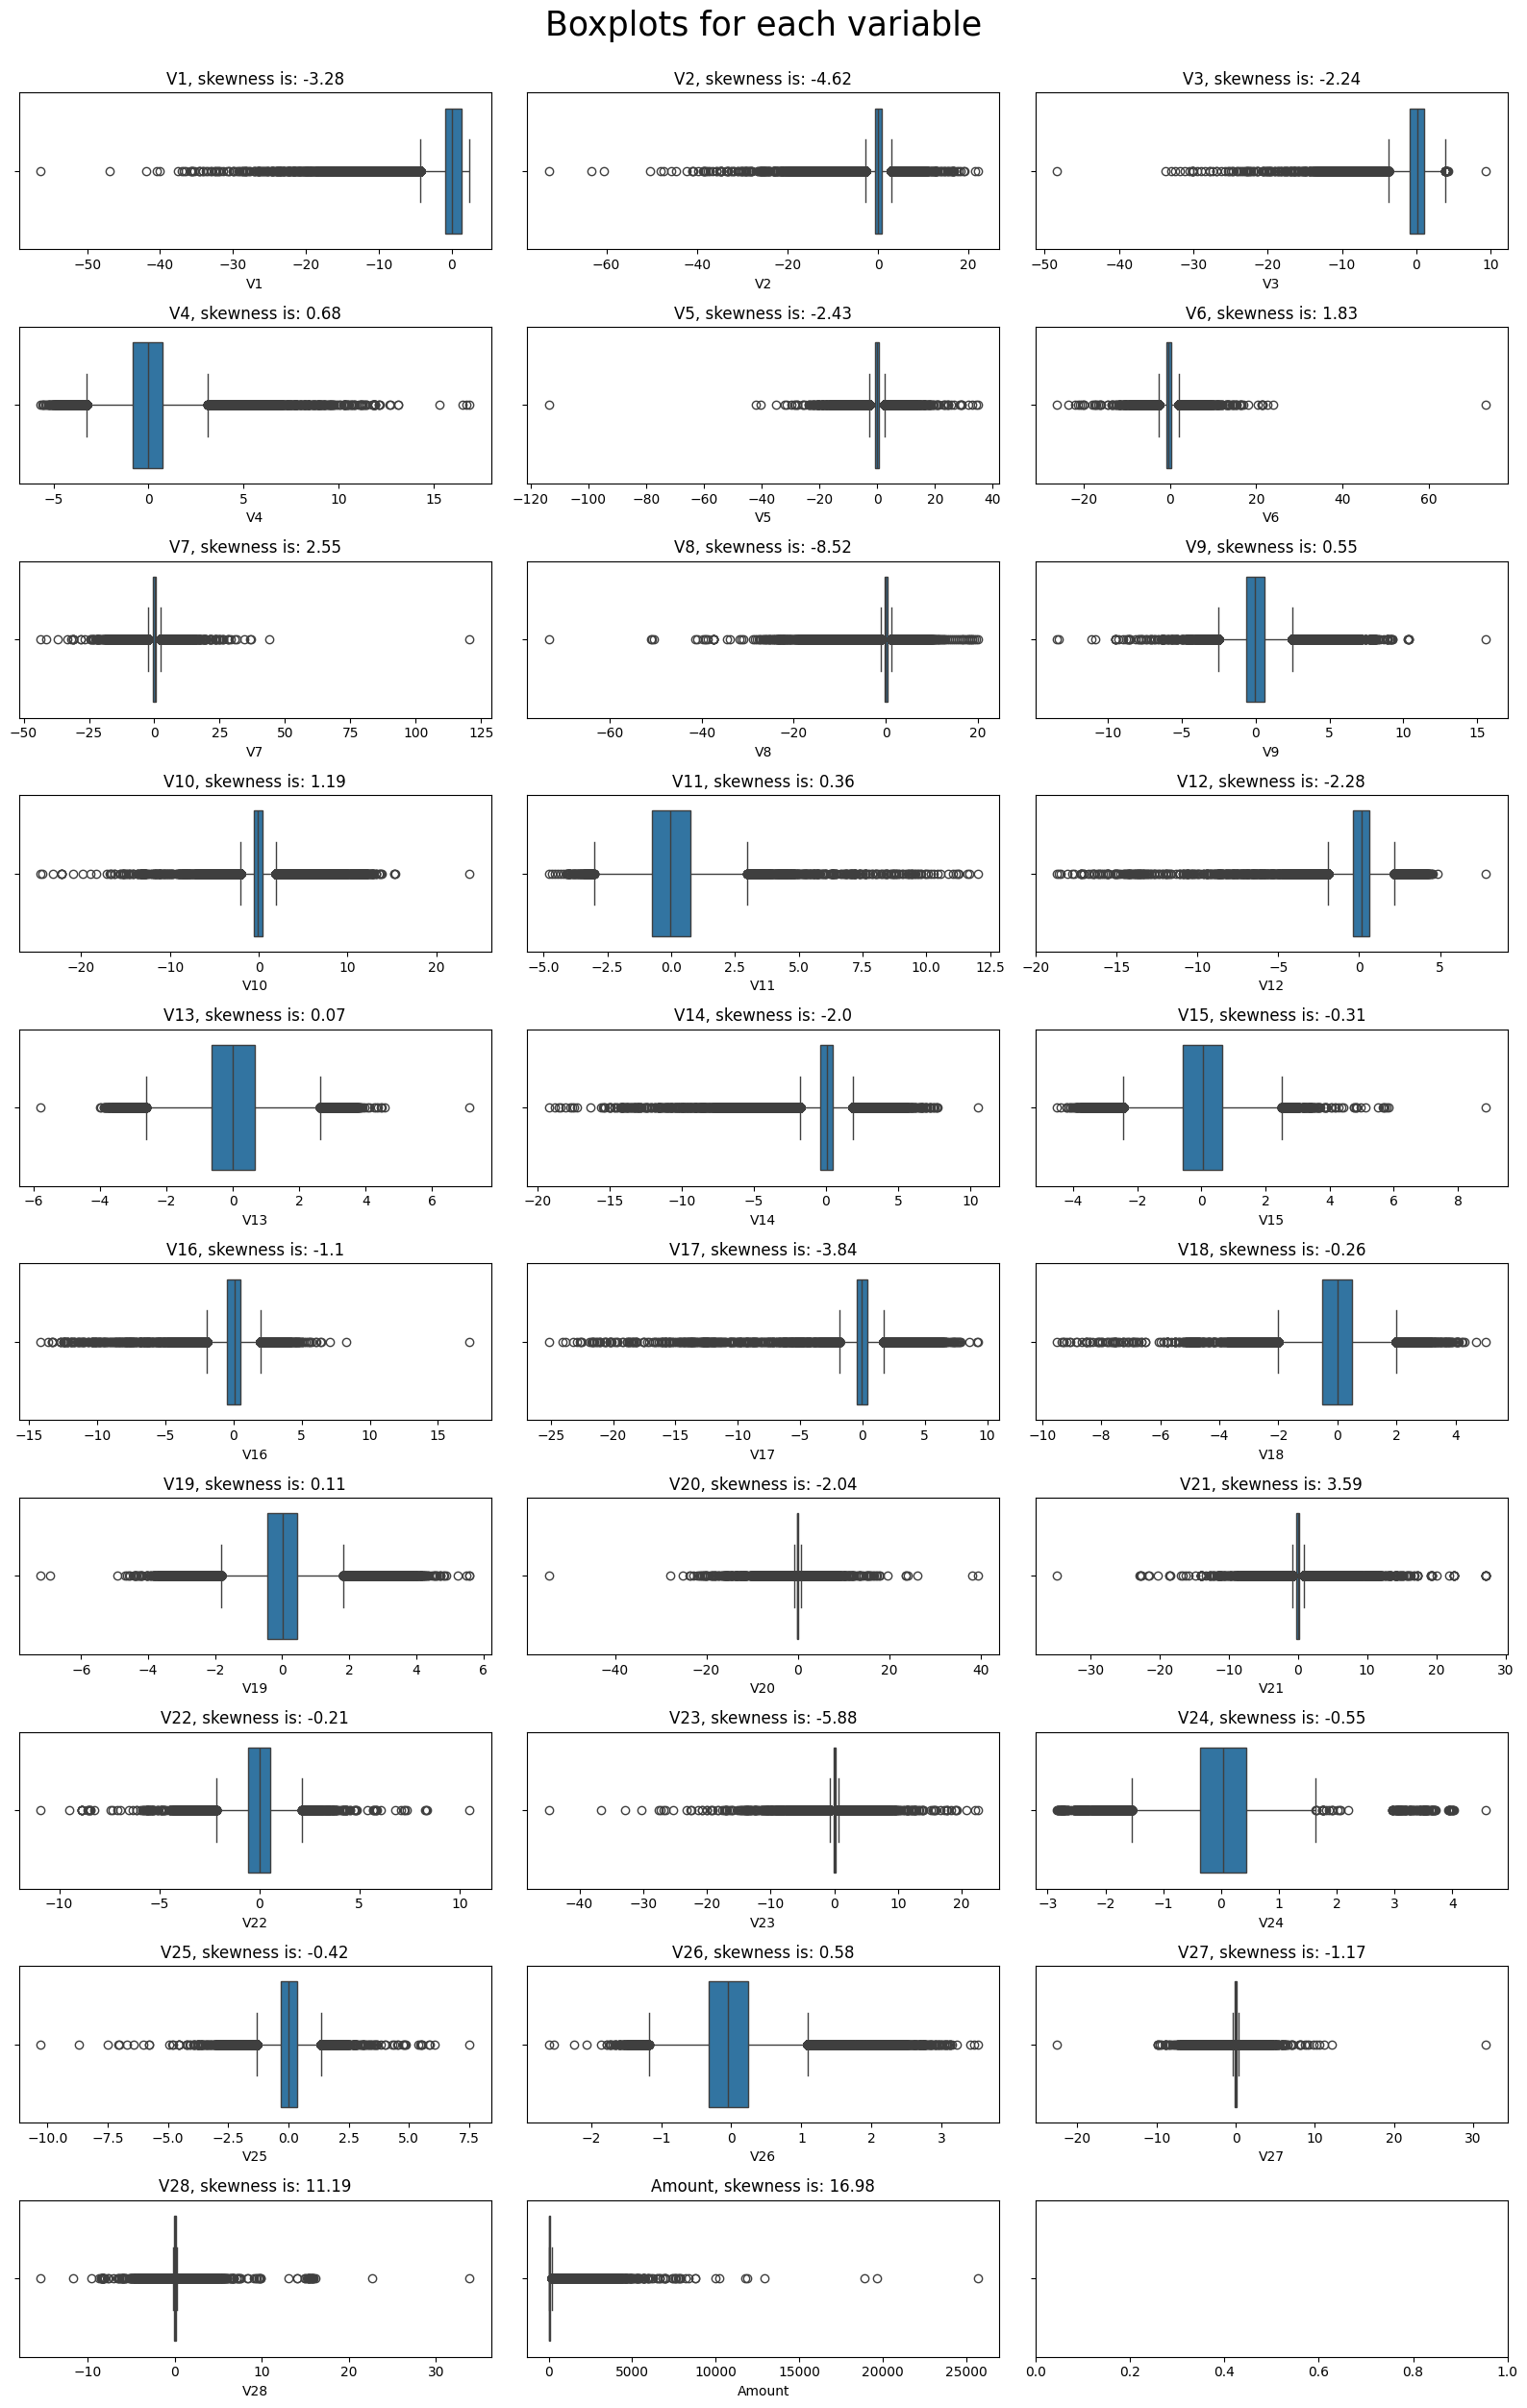

In [6]:
# visualize the data
numeric_columns = (list(df.loc[:, 'V1':'Amount']))

# checking boxplots
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,25))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        
boxplots_custom(dataset=df, columns_list=numeric_columns, rows=10, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()

It looks like we have a significant problems with outliers:

huge outliers;

higly skeved data;

a lot of outliers.

# Task 2 

## Outliear Removal:

In [7]:
def IQR_method (df,n,features):
    outlier_list = []
    
    for column in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        # appending the list of outliers 
        outlier_list.extend(outlier_list_column)
        
    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
    # Calculate the number of records below and above lower and above bound value respectively
    out1 = df[df[column] < Q1 - outlier_step]
    out2 = df[df[column] > Q3 + outlier_step]
    
    print('Total number of deleted outliers is:', out1.shape[0]+out2.shape[0])
    
    return multiple_outliers

In [8]:
Outliers_IQR = IQR_method(df,1,numeric_columns)
df = df.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

Total number of deleted outliers is: 31904


## Data Augmentation:

In [9]:
# Balance Amount and Time
# Scale the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['Time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-2.005823,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.528550,0
1,-2.005823,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.654534,0
2,-2.005802,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.140459,0
3,-2.005780,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.345409,0
4,-2.005780,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.639973,0


In [10]:
# Balance Class
# Splitting the data with Random UnderSampling technique

X = df.drop('Class', axis=1)

y = df['Class']

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

X_res, y_res = rus.fit_resample(X, y)

# set original data
df = pd.DataFrame(X_res, columns=X.columns)
df['Class'] = y_res

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
22298,-1.220351,-0.701226,0.788324,1.804958,-0.484857,0.370019,-0.827568,0.738563,-0.028440,-0.569819,...,-0.089593,-0.337777,0.053123,0.393816,-0.401390,-0.101069,0.070620,0.126692,-0.665083,0
173618,1.217772,2.054695,0.296866,-2.314786,0.816377,1.402820,-0.138133,0.721292,-0.269962,-0.505639,...,0.137098,0.448506,-0.120977,-0.183752,0.589274,-0.483136,-0.036491,-0.070692,-0.337910,0
136093,0.724070,1.988591,-0.207467,-1.058126,0.034991,-0.069445,-0.069228,-0.616547,0.184446,1.103967,...,-0.246810,-0.639772,0.353488,0.205144,-0.476720,-0.311891,0.012382,-0.017275,-0.628086,0
139350,0.768323,-1.453380,0.072756,0.649851,0.387381,2.132761,-0.150969,1.060157,0.098609,-2.036026,...,0.013646,-0.550108,-0.134962,0.269056,0.722934,2.280064,-0.296921,0.014101,0.643311,0
194986,1.497706,0.058186,0.683209,-0.275522,-1.002697,1.109864,-0.047839,0.837023,0.057280,-0.133717,...,-0.297611,-0.754562,-0.084123,-1.407372,-0.349419,0.207157,0.234770,0.073568,-0.561671,0


In [11]:
# Determine number of fraud cases in dataset
Fraud = df[df['Class'] == 1]
Valid = df[df['Class'] == 0]

outlier_fraction = len(Fraud) / float(len(Valid))
print('Outlier Fraction: {}'.format(outlier_fraction))

print('Fraud Cases: {}'.format(len(Fraud)))
print('Valid Cases: {}'.format(len(Valid)))
print('data shape: {}'.format(df.shape))

Outlier Fraction: 1.0
Fraud Cases: 26
Valid Cases: 26
data shape: (52, 31)


In [12]:
# # Augement data with Geometric Masking technique 
# # to add new fraud cases

# from imblearn.over_sampling import SMOTE
# from imblearn.combine import SMOTETomek

# X = df.drop('Class', axis=1)

# y = df['Class']

# smk = SMOTETomek(random_state=42)

# X_res, y_res = smk.fit_resample(X, y)

# # set original data
# df = pd.DataFrame(X_res, columns=X.columns)

# df['Class'] = y_res

# df.head()

In [13]:
# Determine number of fraud cases in dataset
Fraud = df[df['Class'] == 1]
Valid = df[df['Class'] == 0]

outlier_fraction = len(Fraud) / float(len(Valid))
print('Outlier Fraction: {}'.format(outlier_fraction))

print('Fraud Cases: {}'.format(len(Fraud)))
print('Valid Cases: {}'.format(len(Valid)))
print('data shape: {}'.format(df.shape))

Outlier Fraction: 1.0
Fraud Cases: 26
Valid Cases: 26
data shape: (52, 31)


In [14]:
# the data augmentation technique with geometric distribution masks,
# Augement data with Geometric Masking technique
# to add new data points

def augment_data(data, n=10):
    """
    Augment data with geometric distribution masks
    """
    data_augmented = []
    for i in range(n):
        mask = np.random.geometric(0.5, size=data.shape)
        mask = (mask == 1)
        data_augmented.append(data[mask])
    data_augmented = np.vstack(data_augmented)
    data_augmented = pd.DataFrame(data_augmented, columns=data.columns)
    return data_augmented

df = augment_data(df)

In [15]:
# X = df.drop('Class', axis=1)
# y = df['Class']

# sampler = Geometric(random_state=42)
# X_res, y_res = sampler.fit_resample(X, y)

# # Update your dataframe with augmented data and labels
# df = pd.DataFrame(X_res, columns=X.columns)
# df['Class'] = y_res

# df.head()

In [16]:
# Determine number of fraud cases in dataset
Fraud = df[df['Class'] == 1]
Valid = df[df['Class'] == 0]

outlier_fraction = len(Fraud) / float(len(Valid))
print('Outlier Fraction: {}'.format(outlier_fraction))

print('Fraud Cases: {}'.format(len(Fraud)))
print('Valid Cases: {}'.format(len(Valid)))
print('data shape: {}'.format(df.shape))

Outlier Fraction: 0.9899114173228346
Fraud Cases: 4023
Valid Cases: 4064
data shape: (8087, 31)


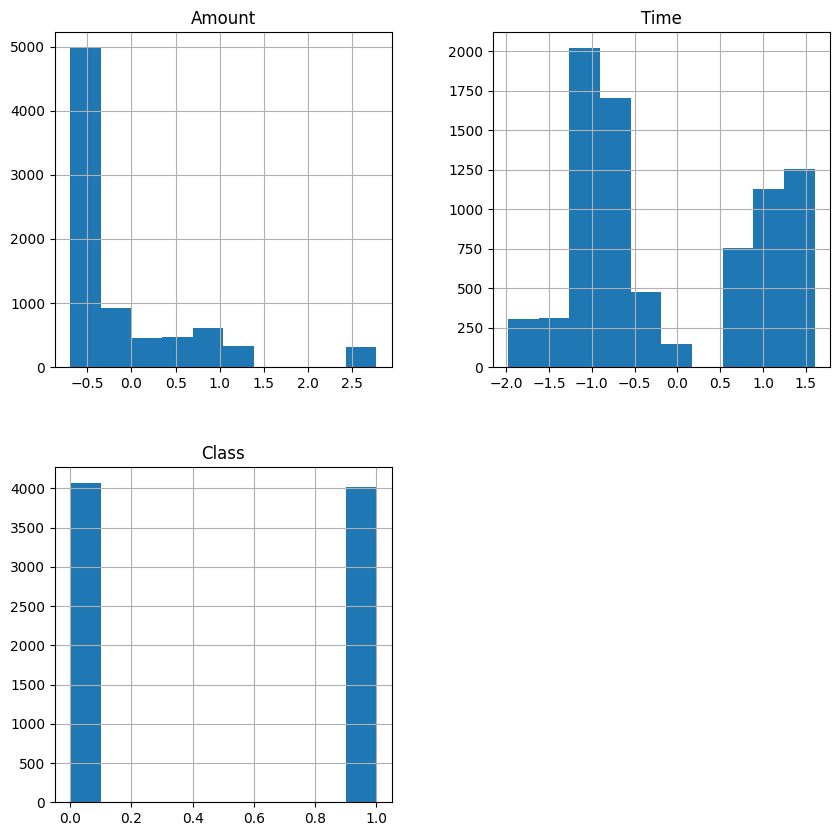

In [17]:
# Plot histogram of Amount, Time, and Class
import matplotlib.pyplot as plt
df[['Amount', 'Time', 'Class']].hist(figsize=(10, 10))
plt.show()

In [18]:
# save preprocessed data
df.to_csv('../data/creditcard_preprocessed.csv', index=False)

df = pd.read_csv('../data/creditcard_preprocessed.csv')

In [98]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X = df.drop(['Class'], axis=1)

y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
print('X_train shape: {}'.format(X_train.shape))
print('X_test shape: {}'.format(X_test.shape))
print('y_train shape: {}'.format(y_train.shape))
print('y_test shape: {}'.format(y_test.shape))

X_train shape: (6469, 30)
X_test shape: (1618, 30)
y_train shape: (6469,)
y_test shape: (1618,)


## Generator - Discriminator - Contrastive Learning:

In [100]:
# util to calculate metrics, f1 score, time, AUC score
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from time import time

def calculate_metrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    return accuracy, f1, auc

In [101]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

# Prepare data pd to tensor
# Convert pandas DataFrames to NumPy arrays
X_train_np = X_train.values
X_test_np = X_test.values
y_train_np = y_train.values
y_test_np = y_test.values

# Convert NumPy arrays to PyTorch tensors
X_train = torch.tensor(X_train_np, dtype=torch.float32)
X_test = torch.tensor(X_test_np, dtype=torch.float32)
y_train = torch.tensor(y_train_np, dtype=torch.float32)
y_test = torch.tensor(y_test_np, dtype=torch.float32)

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

In [23]:
import numpy as np
from tqdm import tqdm

# Define the Transformer-based Autoencoder model with multihead attention
class TransformerAutoencoder(nn.Module):
    def __init__(self, input_size, d_model, num_heads, num_layers, dim_feedforward=2048, dropout=0.1):
        super(TransformerAutoencoder, self).__init__()
        self.encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=num_heads, dim_feedforward=dim_feedforward, dropout=dropout)
        self.encoder = nn.TransformerEncoder(self.encoder_layer, num_layers=num_layers)
        self.decoder_layer = nn.TransformerDecoderLayer(d_model=d_model, nhead=num_heads, dim_feedforward=dim_feedforward, dropout=dropout)
        self.decoder = nn.TransformerDecoder(self.decoder_layer, num_layers=num_layers)
        self.linear_out = nn.Linear(d_model, input_size)

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        decoded = self.linear_out(decoded)
        return decoded

# Define the contrastive loss function
class ContrastiveLoss(nn.Module):
    def __init__(self, margin=2.0):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin

    def forward(self, output1, output2, target):
        euclidean_distance = F.pairwise_distance(output1, output2, keepdim=True)
        loss_contrastive = torch.mean((1 - target) * torch.pow(euclidean_distance, 2) +
                                      (target) * torch.pow(torch.clamp(self.margin - euclidean_distance, min=0.0), 2))
        return loss_contrastive


train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define hyperparameters
input_size = X_train.shape[1]
d_model = 30
num_heads = 5
num_layers = 2
dim_feedforward = 512
dropout = 0.1
lr = 0.001
num_epochs = 10

# Initialize model, loss, and optimizer
model = TransformerAutoencoder(input_size, d_model, num_heads, num_layers, dim_feedforward, dropout)
criterion = ContrastiveLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

losses = []

# start timer
start = time()

# Training loop
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for inputs, targets in tqdm(train_loader):
        optimizer.zero_grad()
        encoded = model.encoder(inputs)  # Encode inputs
        outputs = model.decoder(encoded, memory=encoded)  # Decode encoded output
        decoded = model.linear_out(outputs)
        loss = criterion(decoded, inputs, targets)  # Calculate loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Optimization step
        losses.append(loss.item())
        train_loss += loss.item() * inputs.size(0)
    train_loss /= len(train_loader.dataset)
    
    # Evaluation
    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for inputs, targets in test_loader:
            encoded = model.encoder(inputs)
            outputs = model.decoder(encoded, memory=encoded)
            decoded = model.linear_out(outputs)
            loss = criterion(decoded, inputs, targets)
            test_loss += loss.item() * inputs.size(0)
        test_loss /= len(test_loader.dataset)
    
    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')
    
# end timer
end = time()

# Calculate time taken
time_taken_contrastive = end - start
print('Time taken: {:.0f}m {:.0f}s'.format(time_taken_contrastive // 60, time_taken_contrastive % 60))

c:\Python312\Lib\site-packages\torch\nn\modules\transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
100%|██████████| 102/102 [00:07<00:00, 14.41it/s]


Epoch 1/10, Train Loss: 3.7308, Test Loss: 1.3348


100%|██████████| 102/102 [00:06<00:00, 15.56it/s]


Epoch 2/10, Train Loss: 1.2221, Test Loss: 1.0219


100%|██████████| 102/102 [00:06<00:00, 15.51it/s]


Epoch 3/10, Train Loss: 1.0735, Test Loss: 1.0212


100%|██████████| 102/102 [00:10<00:00,  9.65it/s]


Epoch 4/10, Train Loss: 1.0488, Test Loss: 1.0517


100%|██████████| 102/102 [00:05<00:00, 18.15it/s]


Epoch 5/10, Train Loss: 1.0296, Test Loss: 1.0222


100%|██████████| 102/102 [00:06<00:00, 16.78it/s]


Epoch 6/10, Train Loss: 1.0450, Test Loss: 1.0373


100%|██████████| 102/102 [00:05<00:00, 17.50it/s]


Epoch 7/10, Train Loss: 1.0349, Test Loss: 1.0081


100%|██████████| 102/102 [00:06<00:00, 16.05it/s]


Epoch 8/10, Train Loss: 1.0379, Test Loss: 1.0588


100%|██████████| 102/102 [00:07<00:00, 14.44it/s]


Epoch 9/10, Train Loss: 1.0196, Test Loss: 1.0342


100%|██████████| 102/102 [00:05<00:00, 18.98it/s]


Epoch 10/10, Train Loss: 1.0170, Test Loss: 1.0350
Time taken: 1m 11s


Test Loss: 1.0350


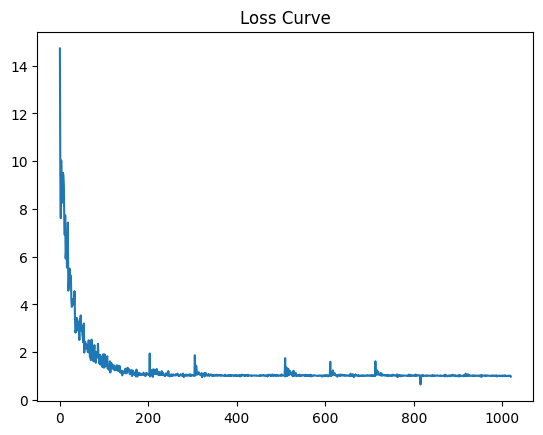

In [24]:
# Evaluate the model

# Plot the loss curve
plt.plot(losses)
plt.title('Loss Curve')

# Accuracy
model.eval()
test_loss = 0.0
with torch.no_grad():
    for inputs, targets in test_loader:
        encoded = model.encoder(inputs)
        outputs = model.decoder(encoded, memory=encoded)
        decoded = model.linear_out(outputs)
        loss = criterion(decoded, inputs, targets)
        test_loss += loss.item() * inputs.size(0)
    test_loss /= len(test_loader.dataset)
    
print(f'Test Loss: {test_loss:.4f}')

In [25]:
# calculate the accuracy, f1 score, and AUC score
model.eval()
y_pred = []
with torch.no_grad():
    for inputs, targets in test_loader:
        encoded = model.encoder(inputs)
        outputs = model.decoder(encoded, memory=encoded)
        decoded = model.linear_out(outputs)
        loss = criterion(decoded, inputs, targets)
        y_pred.extend(F.pairwise_distance(decoded, inputs).numpy().flatten())
        
# Convert y_pred to a NumPy array
y_pred = np.array(y_pred)

# Calculate the threshold for the highest F1 score
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
f1_scores = 2 * precision * recall / (precision + recall)
threshold = thresholds[np.argmax(f1_scores)]

# Calculate the predicted labels
y_pred = (y_pred > threshold).astype(int)

# Calculate metrics
accuracy_contrastive, f1_contrastive, auc_contrastive = calculate_metrics(y_test, y_pred)
print(f'Accuracy: {accuracy_contrastive:.4f}, F1 Score: {f1_contrastive:.4f}, AUC Score: {auc_contrastive:.4f}')

Accuracy: 0.4913, F1 Score: 0.6581, AUC Score: 0.5012


# TASK 3:

## Principal Component Analysis (PCA)

In [108]:
# PCA - Principal Component Analysis

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

start = time()

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

end = time()

time_taken_pca = end - start

# Evaluate the model
y_pred = []

for i in range(len(X_test_pca)):
    euclidean_distance = np.linalg.norm(X_test_pca[i] - X_train_pca, axis=1)
    y_pred.append(int(np.min(euclidean_distance) < threshold))
    
# Convert y_pred to a NumPy array
y_pred = np.array(y_pred)

# Calculate metrics
accuracy_pca, f1_pca, auc_pca = calculate_metrics(y_test, y_pred)
print(f'Accuracy: {accuracy_pca:.4f}, F1 Score: {f1_pca:.4f}, AUC Score: {auc_pca:.4f}')

tensor([0., 0., 0.,  ..., 0., 1., 1.]) [1 1 1 ... 1 1 1]
Accuracy: 0.4901, F1 Score: 0.6578, AUC Score: 0.5000


## Graph Deviation Network (GDN)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import f1_score, classification_report, confusion_matrix

from torch_geometric.loader import DataLoader
from torch_geometric.data import HeteroData
from torch.nn import functional as F
from torch.optim import Adam
from torch import nn
import torch

In [28]:
# GDN - Graph Deviation Network

from torch_geometric.nn import Linear, HeteroConv, SAGEConv, GATConv

class HeteroGNN(torch.nn.Module):
    def __init__(self, dim_h, dim_out, num_layers):
        super().__init__()

        self.convs = torch.nn.ModuleList()
        for _ in range(num_layers):
            conv = HeteroConv({
                ('host', 'to', 'flow'): SAGEConv((-1,-1), dim_h, add_self_loops=False),
                ('flow', 'to', 'host'): SAGEConv((-1,-1), dim_h, add_self_loops=False),
            }, aggr='sum')
            self.convs.append(conv)

        self.lin = Linear(dim_h, dim_out)

    def forward(self, x_dict, edge_index_dict):
        for conv in self.convs:
            x_dict = conv(x_dict, edge_index_dict)
            x_dict = {key: F.leaky_relu(x) for key, x in x_dict.items()}
        return self.lin(x_dict['flow'])
    

In [29]:

BATCH_SIZE = 16
from torch.utils.data import DataLoader, Dataset
from torch_geometric.data import DataLoader, Data

    
def create_dataloader(df, batch_size=BATCH_SIZE):
    data_list = []
    
    for i in range(len(df)):
        # Assuming df is a pandas DataFrame with host and flow features
        host_feature = torch.tensor(df[i, 1:-1], dtype=torch.float)
        flow_feature = torch.tensor(df[i, 1:-1], dtype=torch.float)
        edge_index = torch.tensor([[0, 1], [1, 0]], dtype=torch.long) 
        
        
        data = Data(x={'host': host_feature, 'flow': flow_feature}, edge_index=edge_index)
        data_list.append(data)
    
    return DataLoader(data_list, batch_size=batch_size, shuffle=True)

train_loader = create_dataloader(X_train)
test_loader = create_dataloader(X_test)

C:\Users\faraz\AppData\Local\Temp\ipykernel_1340\1382392584.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  host_feature = torch.tensor(df[i, 1:-1], dtype=torch.float)
C:\Users\faraz\AppData\Local\Temp\ipykernel_1340\1382392584.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  flow_feature = torch.tensor(df[i, 1:-1], dtype=torch.float)
c:\Python312\Lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [30]:
from torch_geometric.nn import Linear, HeteroConv, SAGEConv, GATConv

class HeteroGNN(torch.nn.Module):
    def __init__(self, dim_h, dim_out, num_layers):
        super().__init__()

        self.convs = torch.nn.ModuleList()
        for _ in range(num_layers):
            conv = HeteroConv({
                ('host', 'to', 'flow'): SAGEConv((-1,-1), dim_h),
                ('flow', 'to', 'host'): SAGEConv((-1,-1), dim_h),
            }, aggr='sum')
            self.convs.append(conv)

        self.lin = Linear(dim_h, dim_out)

    def forward(self, x_dict, edge_index_dict):
        for conv in self.convs:
            x_dict = conv(x_dict, edge_index_dict)
            x_dict = {key: F.leaky_relu(x) for key, x in x_dict.items()}
        return self.lin(x_dict['flow'])

In [31]:
model = HeteroGNN(dim_h=64, dim_out=5, num_layers=3)
optimizer = Adam(model.parameters(), lr=0.001)


# @torch.no_grad()
# def test(loader):
#     model.eval()
#     y_pred = []
#     y_true = []
#     n_subgraphs = 0
#     total_loss = 0

#     for batch in loader:
#         out = model(batch, batch.edge_index_dict)
#         loss = F.cross_entropy(out, batch['flow'].y.float())
#         y_pred.append(out.argmax(dim=1))
#         y_true.append(batch['flow'].y.argmax(dim=1))
#         n_subgraphs += BATCH_SIZE
#         total_loss += float(loss) * BATCH_SIZE
        
#     y_pred = torch.cat(y_pred).cpu()
#     y_true = torch.cat(y_true).cpu()
#     f1score = f1_score(y_true, y_pred, average='macro')

#     return total_loss/n_subgraphs, f1score, y_pred, y_true


# model.train()
# for epoch in range(101):
#     n_subgraphs = 0
#     total_loss = 0

#     for batch in train_loader:
#         optimizer.zero_grad()
#         out = model(batch, batch.edge_index_dict)
#         loss = F.cross_entropy(out, batch['flow'].y.float())
#         loss.backward()
#         optimizer.step()

#         n_subgraphs += BATCH_SIZE
#         total_loss += float(loss) * BATCH_SIZE

#     if epoch % 10 == 0:
#         val_loss, f1score, _, _ = test(test_loader)
#         print(f'Epoch {epoch} | Loss: {total_loss/n_subgraphs:.4f} | Val loss: {val_loss:.4f} | Val F1-score: {f1score:.4f}')
    


## Anomaly Transformer 

In [77]:
# Anomaly Transformer
import math

import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np

class AnomalyAttention(nn.Module):
    def __init__(self, N, d_model, sequence_length):
        super(AnomalyAttention, self).__init__()
        self.d_model = d_model
        self.N = N
        self.sequence_length = sequence_length

        self.Wq = nn.Linear(sequence_length, d_model, bias=False)
        self.Wk = nn.Linear(sequence_length, d_model, bias=False)
        self.Wv = nn.Linear(sequence_length, d_model, bias=False)
        self.Ws = nn.Linear(sequence_length, 1, bias=False)

        self.Q = self.K = self.V = self.sigma = torch.zeros((N, d_model))

        self.P = torch.zeros((N, N))
        self.S = torch.zeros((N, N))

    def forward(self, x):
        self.initialize(x)
        self.P = self.prior_association()
        self.S = self.series_association()
        Z = self.reconstruction()
        return Z

    def initialize(self, x):
        self.Q = self.Wq(x)
        self.K = self.Wk(x)
        self.V = self.Wv(x)
        self.sigma = self.Ws(x)

    @staticmethod
    def gaussian_kernel(mean, sigma):
        normalize = 1 / (math.sqrt(2 * torch.pi) * sigma)
        return normalize * torch.exp(-0.5 * (mean / sigma).pow(2))

    def prior_association(self):
        p = torch.from_numpy(
            np.abs(np.indices((self.N, self.N))[0] - np.indices((self.N, self.N))[1])
        )
        gaussian = self.gaussian_kernel(p.float(), self.sigma)
        gaussian /= gaussian.sum(dim=-1).view(-1, 1)
        return gaussian

    def series_association(self):
        return F.softmax((self.Q @ self.K.transpose(1, 2)) / math.sqrt(self.d_model), dim=0)

    def reconstruction(self):
        return self.S @ self.V



class AnomalyTransformerBlock(nn.Module):
    def __init__(self, N, d_model):
        super().__init__()
        self.N, self.d_model = N, d_model

        self.attention = AnomalyAttention(self.N, self.d_model, self.N)
        self.ln1 = nn.LayerNorm(self.d_model)
        self.ff = nn.Sequential(nn.Linear(self.d_model, self.d_model), nn.ReLU())
        self.ln2 = nn.LayerNorm(self.d_model)

    def forward(self, x):
        x_identity = x
        x = self.attention(x)
        z = self.ln1(x + x_identity)

        z_identity = z
        z = self.ff(z)
        z = self.ln2(z + z_identity)

        return z


class AnomalyTransformer(nn.Module):
    def __init__(self, N, d_model, layers, lambda_):
        super().__init__()
        self.N = N
        self.d_model = d_model

        self.blocks = nn.ModuleList(
            [AnomalyTransformerBlock(self.N, self.d_model) for _ in range(layers)]
        )
        self.output = None
        self.lambda_ = lambda_

        self.P_layers = []
        self.S_layers = []

    def forward(self, x):
        for idx, block in enumerate(self.blocks):
            x = block(x)
            self.P_layers.append(block.attention.P)
            self.S_layers.append(block.attention.S)

        self.output = x
        return x

    def layer_association_discrepancy(self, Pl, Sl, x):
        rowwise_kl = lambda row: (
            F.kl_div(Pl[row, :], Sl[row, :]) + F.kl_div(Sl[row, :], Pl[row, :])
        )
        ad_vector = torch.concat(
            [rowwise_kl(row).unsqueeze(0) for row in range(Pl.shape[0])]
        )
        return ad_vector

    def association_discrepancy(self, P_list, S_list, x):

        return (1 / len(P_list)) * sum(
            [
                self.layer_association_discrepancy(P, S, x)
                for P, S in zip(P_list, S_list)
            ]
        )

    def loss_function(self, x_hat, P_list, S_list, lambda_, x):
        frob_norm = torch.linalg.matrix_norm(x_hat - x, ord="fro")
        return frob_norm - (
            lambda_
            * torch.linalg.norm(self.association_discrepancy(P_list, S_list, x), ord=1)
        )

    def min_loss(self, x):
        P_list = self.P_layers
        S_list = [S.detach() for S in self.S_layers]
        lambda_ = -self.lambda_
        return self.loss_function(self.output, P_list, S_list, lambda_, x)

    def max_loss(self, x):
        P_list = [P.detach() for P in self.P_layers]
        S_list = self.S_layers
        lambda_ = self.lambda_
        return self.loss_function(self.output, P_list, S_list, lambda_, x)

    def anomaly_score(self, x):
        ad = F.softmax(
            -self.association_discrepancy(self.P_layers, self.S_layers, x), dim=0
        )

        assert ad.shape[0] == self.N

        norm = torch.tensor(
            [
                torch.linalg.norm(x[i, :] - self.output[i, :], ord=2)
                for i in range(self.N)
            ]
        )

        assert norm.shape[0] == self.N

        score = torch.mul(ad, norm)

        return score

In [78]:
from transformers.optimization import AdamW, get_cosine_schedule_with_warmup

def train(config, model, train_data, val_data):
    train_dataloader = DataLoader(
        train_data,
        batch_size=config.train.batch_size,
        shuffle=config.train.shuffle,
        drop_last=True,
    )
    total_steps = len(train_dataloader) * config.train.epochs
    warmup_steps = max(int(total_steps * config.train.warmup_ratio), 200)
    optimizer = AdamW(
        model.parameters(),
        lr=config.train.lr,
        eps=config.train.adam_epsilon,
    )
    scheduler = get_cosine_schedule_with_warmup(
        optimizer, num_warmup_steps=warmup_steps, num_training_steps=total_steps
    )
    print("Total steps: {}".format(total_steps))
    print("Warmup steps: {}".format(warmup_steps))

    num_steps = 0
    model.train()

    for epoch in range(int(config.train.epochs)):
        model.zero_grad()
        for step, batch in enumerate(tqdm(train_dataloader)):
            print(batch)
            outputs = model(batch)
            min_loss = model.min_loss(batch)
            max_loss = model.max_loss(batch)
            min_loss.backward(retain_graph=True)
            max_loss.backward()

            torch.nn.utils.clip_grad_norm_(
                model.parameters(), config.train.max_grad_norm
            )
            optimizer.step()
            scheduler.step()
            model.zero_grad()

            num_steps += 1

            if not config.debug:
                wandb.log({"loss": loss.item()}, step=num_steps)

        if not config.debug:
            wandb.log(output, step=num_steps)
            torch.save(model.state_dict(), config.train.pt) 


In [80]:
from easydict import EasyDict as edict

config = {
    "train": {
        "batch_size": 64,
        "epochs": 10,
        "shuffle": True,
        "lr": 0.001,
        "adam_epsilon": 1e-8,
        "warmup_ratio": 0.1,
        "max_grad_norm": 1.0,
        "pt": "anomaly_transformer.pt",
    },
    "debug": False,
}

config = edict(config)

model = AnomalyTransformer(N=X_train.shape[1], d_model=64, layers=3, lambda_=0.1)

# train(config, model, X_train, X_test)

## One-Class SVM

In [115]:
# One-Class SVM

from sklearn.svm import OneClassSVM

# Initialize the model
ocsvm = OneClassSVM(kernel='rbf', nu=0.01)

start = time()

# Fit the model
ocsvm.fit(X_train)

end = time()

time_taken_ocsvm = end - start

print('Time taken: {:.0f}m {:.0f}s'.format(time_taken_ocsvm // 60, time_taken_ocsvm % 60))

# Evaluate the model
y_pred = ocsvm.predict(X_test)

# Convert y_pred to a NumPy array
y_pred = np.array(y_pred)

print(y_test, y_pred)
print(y_test.shape, y_pred.shape)

# count unique values

# Calculate metrics
accuracy_ocsvm = accuracy_score(y_test, y_pred)
f1_ocsvm = f1_score(y_test, y_pred)
auc_ocsvm = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy_pca:.4f}, F1 Score: {f1_pca:.4f}, AUC Score: {auc_pca:.4f}')

Time taken: 0m 0s
tensor([0., 0., 0.,  ..., 0., 1., 1.]) [1 1 1 ... 1 1 1]
torch.Size([1618]) (1618,)
[[  -1  336]
 [   1 1282]]


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

## Isolation Forest

In [ ]:
# isolation forest

from sklearn.ensemble import IsolationForest

# Initialize the model
iforest = IsolationForest(contamination=0.01)

start = time()

# Fit the model
iforest.fit(X_train)

end = time()

time_taken_iforest = end - start

print('Time taken: {:.0f}m {:.0f}s'.format(time_taken_iforest // 60, time_taken_iforest % 60))

# Evaluate the model

# Predict the anomaly scores

y_pred = iforest.predict(X_test)

# Convert y_pred to a NumPy array

y_pred = np.array(y_pred)

# Calculate metrics
accuracy_iforest, f1_iforest, auc_iforest = calculate_metrics(y_test, y_pred)
print(f'Accuracy: {accuracy_iforest:.4f}, F1 Score: {f1_iforest:.4f}, AUC Score: {auc_iforest:.4f}')

## Local Outlier Factor

## DBSCAN

# Task 4
